<a href="https://colab.research.google.com/github/VMKR23/DeepLearning/blob/main/FNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 50 1.6432020158401683 1.5973084033290041
2 50 1.5725144488470895 1.5182726081413558
3 50 1.5043755777354941 1.5019666544998749
4 50 1.4974968695183044 1.494934380808963
5 50 1.4929346367240206 1.4906760242920887
6 50 1.4919796411925033 1.4996369594260106
7 50 1.49005542965586 1.4973601917677288
8 50 1.4891240779779105 1.4960446418086184
9 50 1.487150297744442 1.4913995341409612
10 50 1.4897085491782311 1.4945967906638036
11 50 1.4869627245961985 1.4925800275199022
12 50 1.4864152659739513 1.4925712875173063
13 50 1.4865337694123355 1.4908135178722912
14 50 1.4868429327316122 1.4955369445342053
15 50 1.4878158767594458 1.5010843865479095
16 50 1.487339347918659 1.49142814738841
17 50 1.4862315583584913 1.496633823913864
18 50 1.487369384084429 1.5129863174655769
19 50 1.488832697176984 1.493308740326121
20 50 1.4881378773178882 1.493360338331778
21 50 1.4879770799994723 1.4903679090210153
22 50 1.4880282177345585 1.4920987569833104
23 50 1.4885131959467808 1.4968916343737253
24 50 1.4

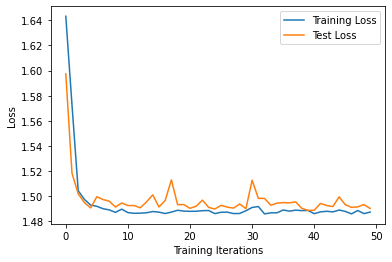

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

class Feed_Forward_Networks(nn.Module):
    def __init__(self):
        super(Feed_Forward_Networks, self).__init__()
        self.Fullyconnectedlayer1 = nn.Linear(784, 256)
        self.RectifiedLinearUnit1 = nn.ReLU()
        self.Fullyconnectedlayer2 = nn.Linear(256, 128)
        self.RectifiedLinearUnit2 = nn.ReLU()
        self.Fullyconnectedlayer3 = nn.Linear(128, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, mp):
        mp = mp.view(-1, 784)
        mp = self.RectifiedLinearUnit1(self.Fullyconnectedlayer1(mp))
        mp = self.RectifiedLinearUnit2(self.Fullyconnectedlayer2(mp))
        mp = self.softmax(self.Fullyconnectedlayer3(mp))
        return mp
train_dataset = datasets.MNIST(root='dataset/', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='dataset/', train=False, transform=transforms.ToTensor(), download=True)
train_ld = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)
test_ld = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=128, shuffle=False)
model = Feed_Forward_Networks()
optim1 = optim.Adam(model.parameters(), lr=0.003)
criterion = nn.CrossEntropyLoss()
n = 50
loss_1es = []
test_losses = []
m=0
while m<n:
    loss_1 = 0.0
    for i, (imgs, lbls) in enumerate(train_ld):
        outputs = model(imgs)
        loss = criterion(outputs, lbls)
        optim1.zero_grad()
        loss.backward()
        optim1.step()
        loss_1 = loss_1+ loss.item()
    loss_1 = loss_1/len(train_ld)
    loss_1es.append(loss_1)
    test_loss = 0.0
    with torch.no_grad():
        for imgs, lbls in test_ld:
            outputs = model(imgs)
            loss = criterion(outputs, lbls)
            test_loss = test_loss+loss.item()
    test_loss = test_loss/len(test_ld)
    test_losses.append(test_loss)
    print(m+1, n, loss_1, test_loss)
    m+=1
plt.plot(loss_1es, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Training Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()
